<a href="https://colab.research.google.com/github/Bbrnn/engage_datascience_ai_ml/blob/main/UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/bmi_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  400 non-null    object
 1   Height  400 non-null    int64 
 2   Weight  400 non-null    int64 
 3   Index   400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [4]:
df.shape

(400, 4)

In [5]:
df.head()

,Gender,Height,Weight,Index
0,Male,161,89,4
1,Male,179,127,4
2,Male,172,139,5
3,Male,153,104,5
4,Male,165,68,2


In [6]:
df.describe(include='all')

,Gender,Height,Weight,Index
count,400,400.000000,400.000000,400.000000
unique,2,NaN,NaN,NaN
top,Male,NaN,NaN,NaN
freq,200,NaN,NaN,NaN
mean,NaN,170.362500,106.060000,3.737500
std,NaN,16.574011,32.362242,1.370507
min,NaN,140.000000,50.000000,0.000000
25%,NaN,156.000000,80.000000,3.000000
50%,NaN,171.000000,106.500000,4.000000
75%,NaN,184.000000,136.250000,5.000000


In [7]:
df.isnull().sum()

,0
Gender,0
Height,0
Weight,0
Index,0


In [8]:
df.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [9]:
df.corr(numeric_only=True)

,Height,Weight,Index
Height,1.000000,0.033126,-0.407796
Weight,0.033126,1.000000,0.801521
Index,-0.407796,0.801521,1.000000


In [10]:
df.sort_values(by='Weight')

,Gender,Height,Weight,Index
308,Male,168,50,1
319,Female,150,50,2
68,Male,182,50,0
138,Female,196,50,0
383,Female,190,50,0
...,...,...,...,...
71,Male,168,160,5
160,Male,178,160,5
387,Female,164,160,5
161,Female,184,160,5


<Axes: xlabel='Height', ylabel='Weight'>

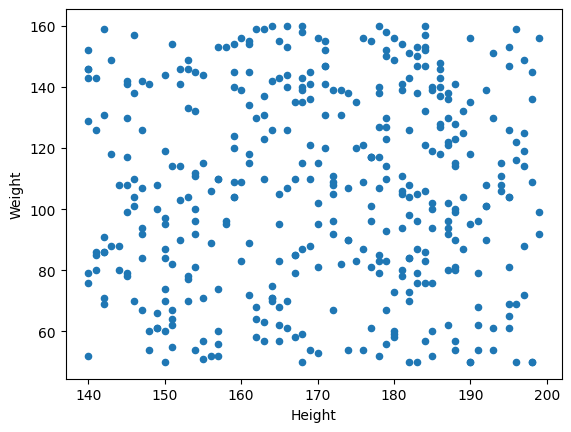

In [11]:
df.plot(kind='scatter',x='Height',y='Weight')

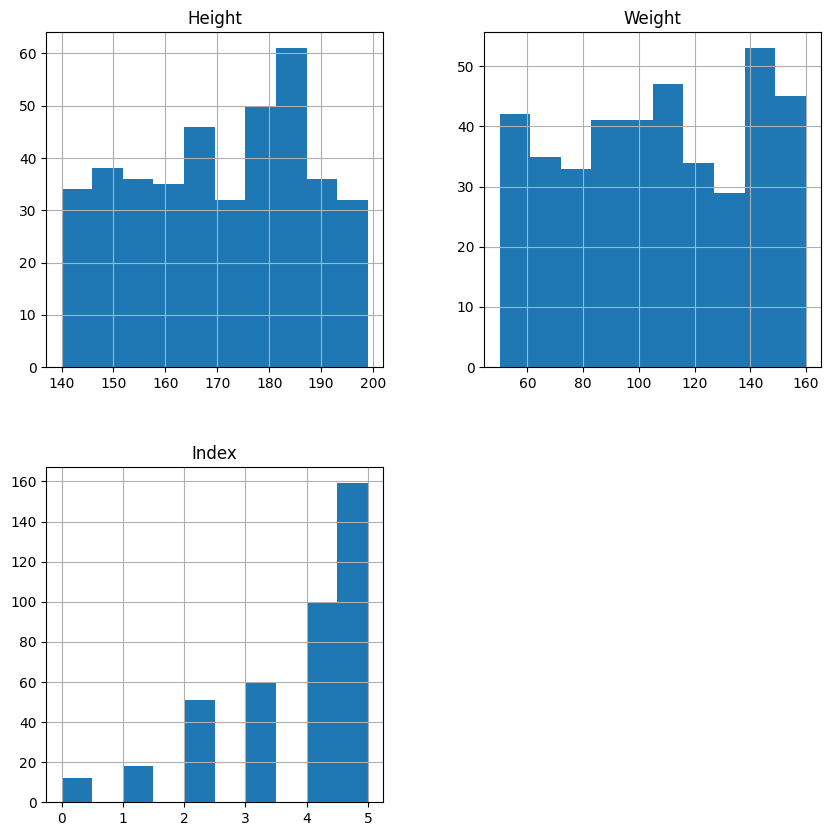

In [12]:
df.hist(figsize=(10,10))
plt.show()

In [13]:
df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,Height,Weight,Index
Height,1.000000,0.033126,-0.407796
Weight,0.033126,1.000000,0.801521
Index,-0.407796,0.801521,1.000000


In [14]:
df['Height'].value_counts()

,count
Height,
179,12
188,12
184,12
182,11
187,11
168,10
178,10
183,10
150,10


In [15]:
df['Height'].unique()

array([161, 179, 172, 153, 165, 182, 142, 158, 194, 178, 155, 151, 181,
       147, 146, 157, 173, 170, 190, 168, 188, 162, 185, 192, 152, 169,
       140, 141, 191, 197, 163, 189, 186, 195, 148, 150, 184, 154, 144,
       177, 167, 145, 193, 187, 183, 149, 171, 180, 176, 159, 166, 143,
       196, 198, 156, 160, 164, 174, 199, 175])

In [16]:
df['Height'].nunique()

60

In [17]:
df['Weight'].value_counts()


,count
Weight,
50,9
104,8
54,8
110,7
108,7
...,...
98,1
53,1
66,1


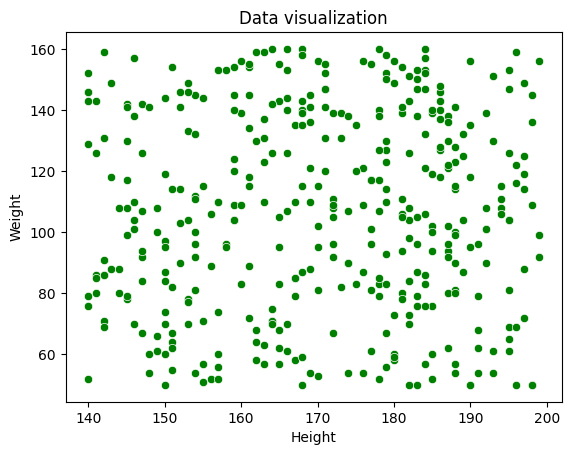

In [18]:
sns.scatterplot(x='Height',y='Weight',data=df,color='green')
plt.title("Data visualization")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#TRANSFORMATION

##Standard scaler

## Min Max scler

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
df['standardscaled_weight']=scaler.fit_transform(df[['Weight']])
df

,Gender,Height,Weight,Index,standardscaled_weight
0,Male,161,89,4,-0.527818
1,Male,179,127,4,0.647861
2,Male,172,139,5,1.019128
3,Male,153,104,5,-0.063734
4,Male,165,68,2,-1.177535
...,...,...,...,...,...
395,Male,166,160,5,1.668845
396,Male,145,130,5,0.740677
397,Male,178,138,5,0.988189
398,Male,168,158,5,1.606967


In [20]:
minmaxscaler = MinMaxScaler()
df ['minmaxscaled_weight'] = minmaxscaler.fit_transform(df[['Weight']])
df

,Gender,Height,Weight,Index,standardscaled_weight,minmaxscaled_weight
0,Male,161,89,4,-0.527818,0.354545
1,Male,179,127,4,0.647861,0.700000
2,Male,172,139,5,1.019128,0.809091
3,Male,153,104,5,-0.063734,0.490909
4,Male,165,68,2,-1.177535,0.163636
...,...,...,...,...,...,...
395,Male,166,160,5,1.668845,1.000000
396,Male,145,130,5,0.740677,0.727273
397,Male,178,138,5,0.988189,0.800000
398,Male,168,158,5,1.606967,0.981818


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 400 non-null    object 
 1   Height                 400 non-null    int64  
 2   Weight                 400 non-null    int64  
 3   Index                  400 non-null    int64  
 4   standardscaled_weight  400 non-null    float64
 5   minmaxscaled_weight    400 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 18.9+ KB


#ONE HOT ENCODING

In [22]:
df = pd.get_dummies(df,columns=['Gender'])
df

,Height,Weight,Index,standardscaled_weight,minmaxscaled_weight,Gender_Female,Gender_Male
0,161,89,4,-0.527818,0.354545,False,True
1,179,127,4,0.647861,0.700000,False,True
2,172,139,5,1.019128,0.809091,False,True
3,153,104,5,-0.063734,0.490909,False,True
4,165,68,2,-1.177535,0.163636,False,True
...,...,...,...,...,...,...,...
395,166,160,5,1.668845,1.000000,False,True
396,145,130,5,0.740677,0.727273,False,True
397,178,138,5,0.988189,0.800000,False,True
398,168,158,5,1.606967,0.981818,False,True


A label encoder is used to transform categorical data (like strings or labels) into numerical data. This is often needed because many machine learning algorithms require numerical input.

Here's how it works:

Fit: The label encoder analyzes the unique values in your categorical column.
Transform: It assigns a unique numerical label (starting from 0) to each of these unique values.

In [23]:
from sklearn.preprocessing import LabelEncoder
labelenc=LabelEncoder()
df['Gender_female']=labelenc.fit_transform(df['Gender_Female'])
df['Gender_male']=labelenc.fit_transform(df['Gender_Male'])
df

,Height,Weight,Index,standardscaled_weight,minmaxscaled_weight,Gender_Female,Gender_Male,Gender_female,Gender_male
0,161,89,4,-0.527818,0.354545,False,True,0,1
1,179,127,4,0.647861,0.700000,False,True,0,1
2,172,139,5,1.019128,0.809091,False,True,0,1
3,153,104,5,-0.063734,0.490909,False,True,0,1
4,165,68,2,-1.177535,0.163636,False,True,0,1
...,...,...,...,...,...,...,...,...,...
395,166,160,5,1.668845,1.000000,False,True,0,1
396,145,130,5,0.740677,0.727273,False,True,0,1
397,178,138,5,0.988189,0.800000,False,True,0,1
398,168,158,5,1.606967,0.981818,False,True,0,1


In [24]:
df.to_csv("transformed_bmi.csv")

In [25]:
selected_columns= df[['Gender_female','Gender_male']]

In [26]:
#Save to a text file
selected_columns.to_csv('selected_columns.txt',sep ='\t', index=False, header=True)

#K-MEANS

In [27]:
data=pd.read_csv('/content/transformed_bmi.csv')
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(data)  # Specify data to fit
  wcss.append(kmeans.inertia_)  # Access inertia after fitting

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

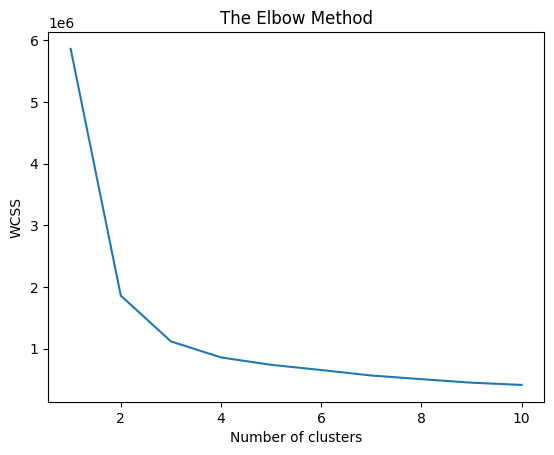

In [28]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


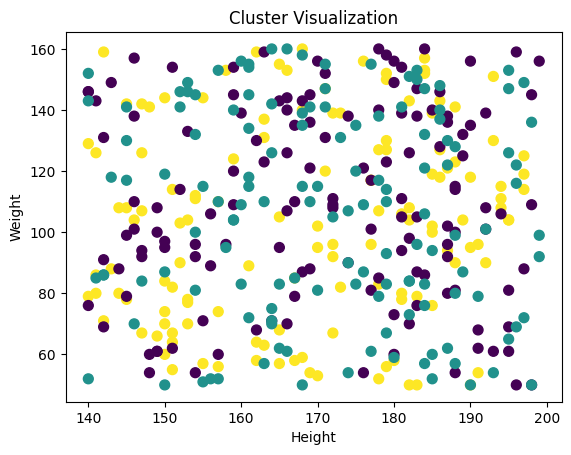

In [31]:
plt.scatter(data['Height'], data['Weight'], c=y_kmeans, s=50, cmap='viridis')
plt.title("Cluster Visualization")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()